In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

from datetime import datetime

import IPython
import IPython.display
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

2023-08-29 17:17:43.236445: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df_climate = pd.read_csv(csv_path)

In [5]:
# Backup
df_climate_back = df_climate.copy()

In [6]:
# 아래 코드는 10분단위로 들어온 데이터를 50분 데이터만 추출해,
# 그 데이터를 해당 시간의 대표값으로 처리하는 방법
# df = df[5::6]

# 아래 방법은 해당 시간대의 평균값으로 대체하는 공식
df_climate['Date Time'] = \
    pd.to_datetime(df_climate['Date Time'], format='%d.%m.%Y %H:%M:%S')
df_climate.set_index('Date Time', inplace=True)
df_climate = df_climate.resample('H').mean()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [10]:
df_climate.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,265.118000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000
2009-01-01 01:00:00,996.525000,-8.065000,265.361667,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667
2009-01-01 02:00:00,996.745000,-8.763333,264.645000,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667
2009-01-01 03:00:00,996.986667,-8.896667,264.491667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333
2009-01-01 04:00:00,997.158333,-9.348333,264.026667,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333


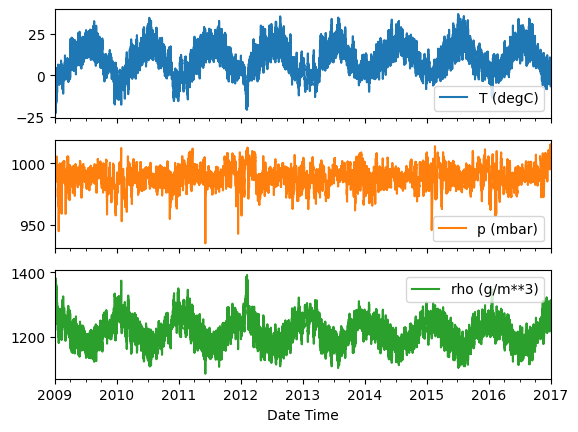

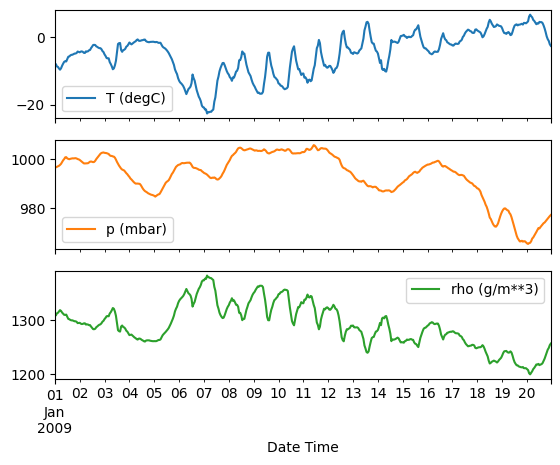

In [11]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df_climate[plot_cols]
plot_features.index = df_climate.index
_ = plot_features.plot(subplots=True)

plot_features = df_climate[plot_cols][:480]
plot_features.index = df_climate.index[:480]
_ = plot_features.plot(subplots=True)

In [12]:
df_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70041.0,989.214359,8.358615,934.905000,984.206667,989.570000,994.726667,1015.243333
T (degC),70041.0,9.442390,8.414647,-22.653333,3.358333,9.410000,15.461667,37.038333
Tpot (K),70041.0,283.484834,8.495644,250.970000,277.430000,283.455000,289.515000,310.976667
Tdew (degC),70041.0,4.953446,6.727769,-24.601667,0.233333,5.215000,10.068333,23.016667
rh (%),70041.0,76.028671,16.385638,13.683333,65.308333,79.266667,89.350000,100.000000
VPmax (mbar),70041.0,13.568619,7.725238,0.980000,7.776667,11.818333,17.598333,62.943333
VPact (mbar),70041.0,9.532337,4.180956,0.821667,6.213333,8.861667,12.351667,28.168333
VPdef (mbar),70041.0,4.036199,4.874833,0.000000,0.878333,2.195000,5.290000,45.195000
sh (g/kg),70041.0,6.021505,2.654106,0.516667,3.918333,5.595000,7.801667,18.025000
H2OC (mmol/mol),70041.0,9.638782,4.232169,0.828333,6.283333,8.963333,12.481667,28.661667


In [16]:
# 이 두 행은 조건에 의해 특정 컬럼값을 변경시키는 방법임(같은 기능)
df_climate.loc[df_climate['wv (m/s)'] < 0.0, 'wv (m/s)'] = 0.0
df_climate['max. wv (m/s)'] = df_climate['max. wv (m/s)'].apply(lambda x: 0 if x < 0 else x)

In [17]:
df_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70041.0,989.214359,8.358615,934.905000,984.206667,989.570000,994.726667,1015.243333
T (degC),70041.0,9.442390,8.414647,-22.653333,3.358333,9.410000,15.461667,37.038333
Tpot (K),70041.0,283.484834,8.495644,250.970000,277.430000,283.455000,289.515000,310.976667
Tdew (degC),70041.0,4.953446,6.727769,-24.601667,0.233333,5.215000,10.068333,23.016667
rh (%),70041.0,76.028671,16.385638,13.683333,65.308333,79.266667,89.350000,100.000000
VPmax (mbar),70041.0,13.568619,7.725238,0.980000,7.776667,11.818333,17.598333,62.943333
VPact (mbar),70041.0,9.532337,4.180956,0.821667,6.213333,8.861667,12.351667,28.168333
VPdef (mbar),70041.0,4.036199,4.874833,0.000000,0.878333,2.195000,5.290000,45.195000
sh (g/kg),70041.0,6.021505,2.654106,0.516667,3.918333,5.595000,7.801667,18.025000
H2OC (mmol/mol),70041.0,9.638782,4.232169,0.828333,6.283333,8.963333,12.481667,28.661667


In [ ]:
# 풍속과 풍향을 결합해 바람벡터 생성

wv = df_climate.pop('wv (m/s)')
max_wv = df_climate.pop('max. wv (m/s)')

wd_radian = df_climate.pop('wd (deg)') * np.pi / 180

# 바람백터 생성
df_climate['Vwv_X'] = wv * np.cos(wd_radian)
df_climate['Vwv_Y'] = wv * np.sin(wd_radian)

https://www.tensorflow.org/tutorials/structured_data/time_series?hl=ko